## Example of How to Use the Dataset

### Loading the Dataset

We recommend loading the biased dataset first as it is much smaller. The biased dataset is a subset of the raw dataset, with heavy biasing towards the first part of the optimization trajectory.  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Change the next line to the folder containing the .pkl files
load_name = 'biased_data'

load_name = os.path.join('data',load_name)

# Example of how to load the train, test, and validation dataframes
load_path = os.path.join(load_name,'train_test_val.pkl')
with open(load_path, 'rb') as f:
    df_train, df_test, df_val = pd.read_pickle(f)

# Example of how to load the train, test, and validation airfoil coordinates
load_path = os.path.join(load_name,'train_test_val_airfoils.pkl')
with open(load_path, 'rb') as f:
    airfoils_train, airfoils_test, airfoils_val = pd.read_pickle(f)

# Get the number of airfoil cases (optimization runs) in each dataset

# Unique cases in the datasets
n_cases_train = len(df_train['case_num'].unique())
n_cases_test = len(df_test['case_num'].unique())
n_cases_val = len(df_val['case_num'].unique())

print('Number of cases in the training set: {}'.format(n_cases_train))
print('Number of cases in the test set: {}'.format(n_cases_test))
print('Number of cases in the validation set: {}'.format(n_cases_val))

Number of cases in the training set: 748
Number of cases in the test set: 140
Number of cases in the validation set: 47


### Usage of the Dataset

airfoils_case shape: (26, 2, 192)
Total number of slices: 26


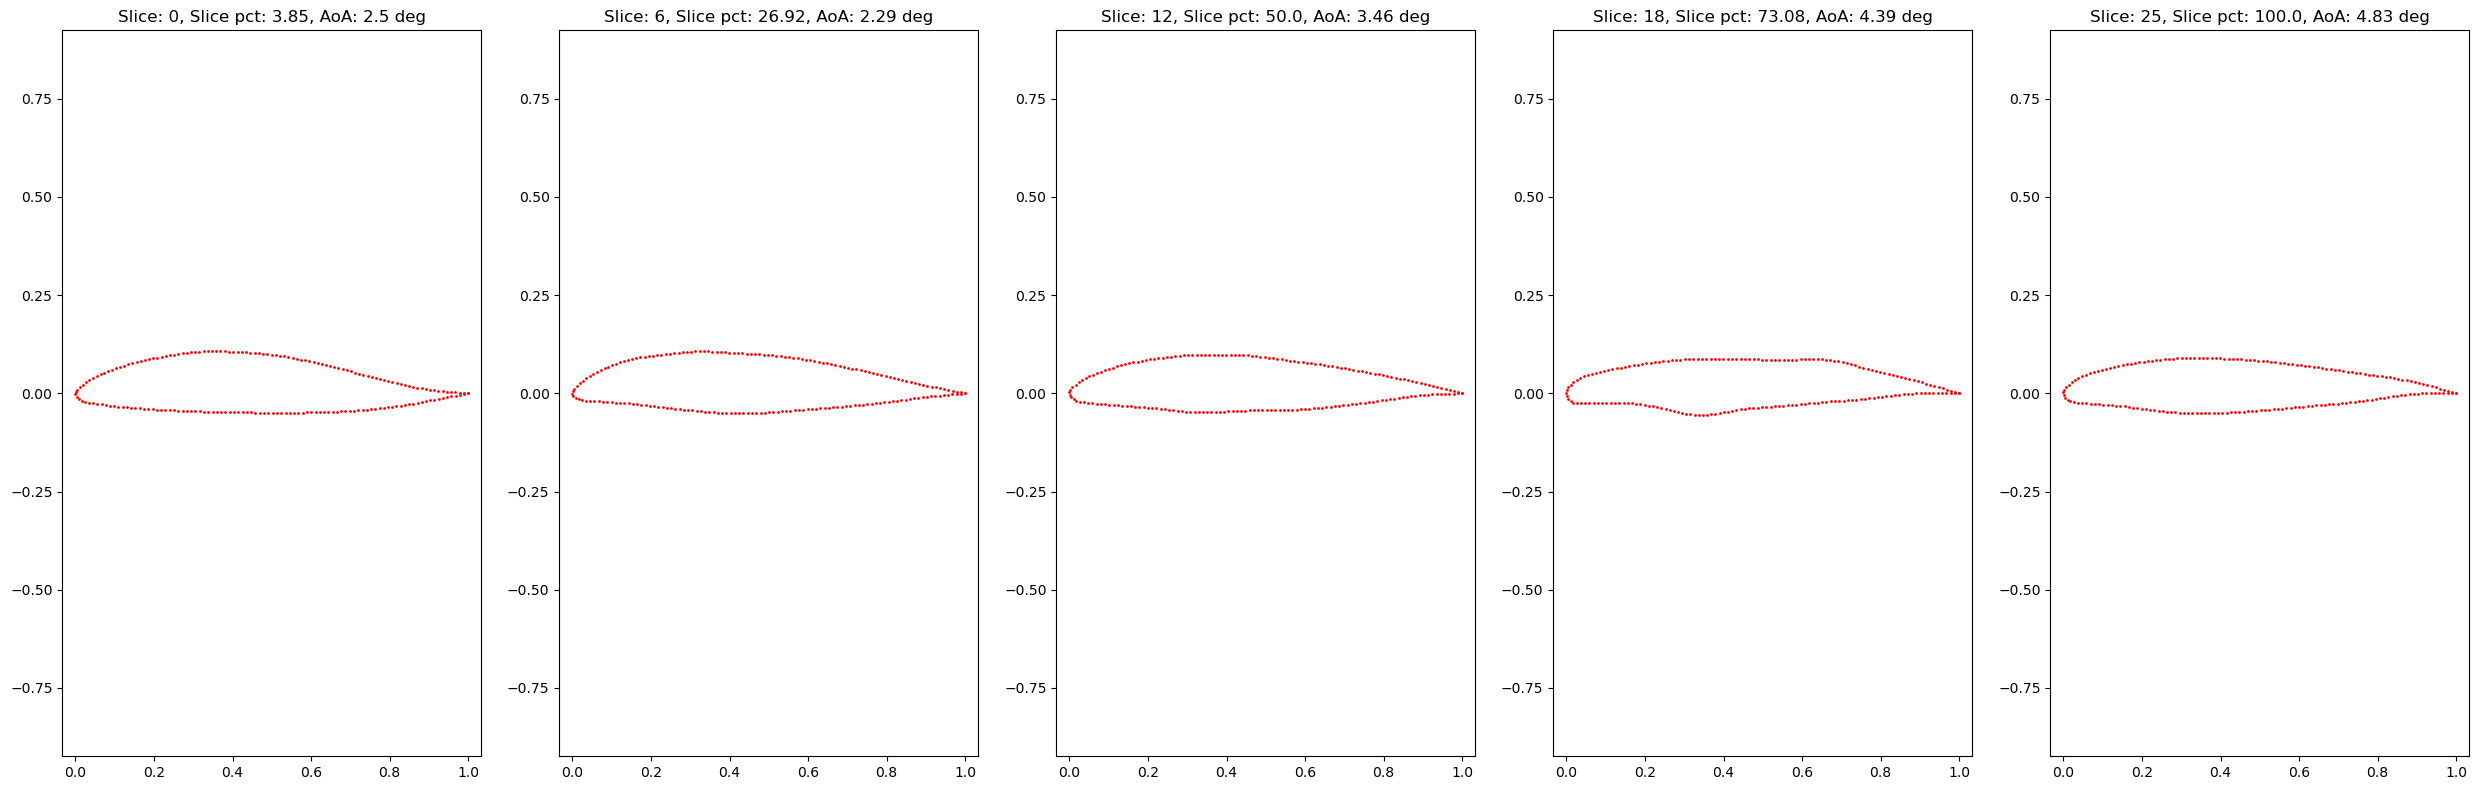

In [23]:
# Properties that can be accessed:
# 'case_num' : case number (int)* 
# 'slice_num' : slice number; i.e the shape of the airfoil at a given optimization iteration (int)
# 'initial' : whether the slice is the initial slice (bool)
# 'final' : whether the slice is the final slice (bool)
# 'mach' : mach number (float)*
# 'reynolds' : reynolds number (float)*
# 'cl_target' : target section lift coefficient (float)*
# 'area_target' : target area (float)*
# 'alpha' : angle of attack at a given optimization iteration (float)
# 'area_initial' : initial area (float)*
# 'cd_val' : section drag coefficient at a given optimization iteration (float)
# 'cl_val' : section lift coefficient at a given optimization iteration (float)
# 'cl_con' : section lift coefficient constraint at a given optimization iteration (float)
# 'area_con' : section area constraint at a given optimization iteration (float)

#  Note, * : Same for all slices in a given case

# Example showing how you can plot the airfoils for a given case number (between 0 and n_cases_train-1)
case_num_choice = n_cases_train-1

# Convert from index to case number
case_num_choice = df_train['case_num'].unique()[case_num_choice]

# Reset indices
df_train = df_train.reset_index(drop=True)

df_case = df_train.loc[df_train['case_num'] == case_num_choice]

# Get the ids that correspond to the rows for the matching case and slice numbers
ids_case = df_case.index.values

airfoils_case = airfoils_train[ids_case]

print(f'airfoils_case shape: {airfoils_case.shape}')
# Format of airfoils_case: (n_slices, 2, n_points)

# Plot the airfoils
n_slice_plot = 5
slice_plots = np.linspace(0, len(airfoils_case)-1, n_slice_plot).astype(int)
fig, axs = plt.subplots(1, n_slice_plot, figsize=(25, 8))

iters_tot = len(df_case['slice_num'])
print(f'Total number of slices: {iters_tot}')
iter_vals = np.arange(iters_tot)

if axs.ndim == 1:
    axs = axs.reshape(-1, 1)

for i in range(n_slice_plot):
    # Plot the reordered slice
    airfoil = airfoils_case[slice_plots[i]]
    # Get the x and y coordinates
    coordx = airfoil[0,:]
    coordy = airfoil[1,:]

    axs[i,0].scatter(coordx, coordy, s=1, c='r', marker='o')
    iter_val = iter_vals[slice_plots[i]]

    slice_pct = np.round(((iter_val+1)/ len(df_case['slice_num'].unique())) * 100, 2)
    
    # Access the angle of attack and drag coefficient for the given slice
    alpha = df_case['alpha'].iloc[slice_plots[i]]

    axs[i,0].set_title(f'Slice: {iter_val}, Slice pct: {slice_pct}, AoA: {np.round(alpha, 2)} deg', fontsize=12)
    axs[i,0].set_xlim(-0.001, 1.001)
    axs[i,0].axis('equal')
    axs[i,0].set_ylim(-0.2, 0.2)
    axs[i,0].set_xlim(-0.001, 1.001)
plt.tight_layout()
